In [106]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Activation, Flatten, Input, Dropout
from keras.models import Sequential

In [107]:
def loadData():
    file = open('/content/drive/MyDrive/Colab Notebooks/face.data', 'rb')
    (images, labels) = pickle.load(file)
    file.close()
    print(images.shape)
    print(labels.shape)
    return images, labels

In [108]:
X,y = loadData()
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

(989, 128, 128, 3)
(989, 1)


In [109]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [111]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [112]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [113]:
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
25/25 [==============================] - 4s 56ms/step - loss: 0.4023 - accuracy: 0.8635 - val_loss: 0.0766 - val_accuracy: 0.9949
Epoch 2/10
25/25 [==============================] - 1s 48ms/step - loss: 0.0190 - accuracy: 1.0000 - val_loss: 0.0295 - val_accuracy: 0.9949
Epoch 3/10
25/25 [==============================] - 1s 48ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0342 - val_accuracy: 0.9949
Epoch 4/10
25/25 [==============================] - 1s 50ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0320 - val_accuracy: 0.9949
Epoch 5/10
25/25 [==============================] - 1s 48ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0369 - val_accuracy: 0.9949
Epoch 6/10
25/25 [==============================] - 1s 48ms/step - loss: 8.4682e-04 - accuracy: 1.0000 - val_loss: 0.0350 - val_accuracy: 0.9949
Epoch 7/10
25/25 [==============================] - 1s 48ms/step - loss: 7.2494e-04 - accuracy: 1.0000 - val_loss: 0.0370 - val_accuracy: 0.9949
Epoch

In [114]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: %.4f'% score[0])
print('Test accuracy %.4f'% score[1])

Test loss: 0.0386
Test accuracy 0.9949


In [115]:
model.save('Final.h5')

In [116]:
from keras.models import load_model
model5=load_model('Final.h5')

In [117]:
import cv2 as cv
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

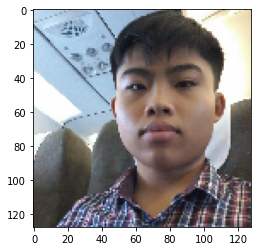

In [118]:
img = load_img('/content/DT1.jpg',target_size=(128,128))
plt.imshow(img)
img = img_to_array(img)

In [119]:
img = cv.resize(img, dsize=(128, 128))
img = img.astype('float')*1./255
# Convert to tensor
img = np.expand_dims(img, axis=0)

In [120]:
class_name = ['Tien','BanCuaTien']

In [121]:
class_name[np.argmax(model5.predict(img),axis=1)[0]]

'Tien'